# Alchemy Stars Gacha Simulations

Built for Dragon Maid collab event

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from copium.gacha import _GachaMachineCompanion

### Parameters

`SAMPLES` - sample size

`UNIT` - amou of different units

`MBT` - number of the same unit for max breakthrough

In [2]:
SAMPLES = 1_000_000
UNITS = 2
MBT = 5
REAL_PULLS = 200

EXPECTED_RESULT = _GachaMachineCompanion.PullResult.BANNER

### Define function to draw histograms

In [3]:
def make_hist(pulls):
    data = np.asarray(pulls)
    mode = np.bincount(data).argmax()

    hist = plt.hist(data, np.arange(data.min() - 0.5, data.max() + 1.5))
    mode_line = plt.axvline(mode, color='k', linestyle='dashed', linewidth=1, label='Mode')
    pulls_line = plt.axvline(REAL_PULLS, color='r', linestyle='dashed', linewidth=1, label='Current')
    plt.legend()

    return plt.show()

### Calculate pulls for BT2 SSRs

As both SSRs are in two separate banners, it is the same as pulling one girl twice in one banner

In [4]:
pulls = _GachaMachineCompanion.make_pulls_distribution(
    samples=SAMPLES,
    expected=EXPECTED_RESULT,
    amount=UNITS,
)

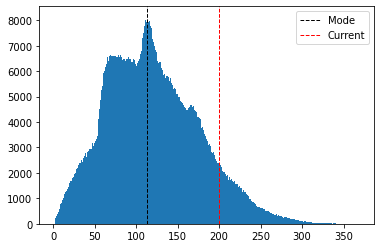

In [5]:
make_hist(pulls)

### Calculate pulls for MBT SSRs

In [6]:
pulls = _GachaMachineCompanion.make_pulls_distribution(
    samples=SAMPLES,
    expected=EXPECTED_RESULT,
    amount=UNITS * MBT,
)

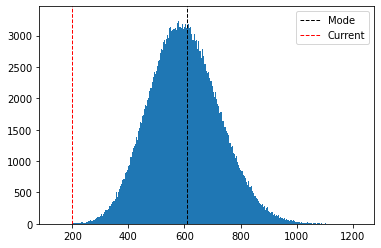

In [7]:
make_hist(pulls)